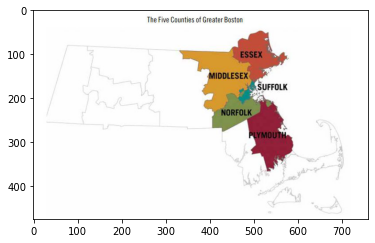

In [21]:
import pandas as pd
#The dataset I am working with for this project is publicly available at mass.gov (Link here: https://masscrime.chs.state.ma.us/public/Browse/browsetables.aspx)
#It shows crime statistics by county broken out by year and type of offense. 
#I am purchasing my first home in this coming year and I will be using this dataset to compare the safety of different areas in which I plan to purchase.
#Specifically, I will compare Suffolk, Essex, Norfolk, Plymouth, and Middlesex county.

#The questions I would like to answer are: 
##Which county is the safest as of the lastest record? 
##Are the counties getting safer or less safe over time? 
##What are the top 3 types of offenses in each of the 5 counties I have chosen to assess?

#The counties I am focusing on are shown on the image below. 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image = mpimg.imread("C:/Users/Noela_tm/Pictures/Boston.JPG")
plt.imshow(image)
plt.show()

#importing the dataset into Jupyter Notebook
df= pd.read_excel('C:/Users/Noela_tm/Downloads/SRS Crime Rates by Local Police Department.xlsx',
    sheet_name='SRS Crime Rates by Local Police')

#if you would like to download this dataset, you can do so by the following code
df.to_excel('Safe_to_Live.xlsx')

In [22]:
df.head(10)

,County,Month,Offense,Year,Count,Population,Rate
0,Barnstable County,January,All Summary Offenses,2019,270.0,211470,1.28
1,Barnstable County,January,Criminal Homicide,2019,1.0,211470,0.00
2,Barnstable County,January,Murder and Nonnegligent Homicide,2019,0.0,211470,0.00
3,Barnstable County,January,Manslaughter by Negligence,2019,1.0,211470,0.00
4,Barnstable County,January,Forcible Rape Total,2019,7.0,211470,0.03
5,Barnstable County,January,Rape by Force,2019,7.0,211470,0.03
6,Barnstable County,January,Attempts to commit Forcible Rape,2019,0.0,211470,0.00
7,Barnstable County,January,Firearm,2019,2.0,211470,0.01
8,Barnstable County,January,Knife or Cutting Instrument,2019,0.0,211470,0.00
9,Barnstable County,January,Other Dangerous Weapon,2019,1.0,211470,0.00


In [53]:
#DATA CLEANING: First, I am removing the Countys I am not interested in comparing
df=df[df.County != 'Barnstable County']
df=df[df.County != 'Berkshire County']
df=df[df.County != 'Bristol County']
df=df[df.County != 'Dukes County']
df=df[df.County != 'Franklin County']
df=df[df.County != 'Hampden County']
df=df[df.County != 'Hampshire County']
df=df[df.County != 'Nantucket County']
df=df[df.County != 'Worcester County']

#I am also removing the columns that I don't care about, 
#specifically the month and the population size since those are not important to the questions I am answering
df=df.drop(columns=['Month', 'Population'])
df.head(10)


,County,Offense,Year,Count,Rate
1104,Essex County,All Summary Offenses,2019,1020.0,1.29
1105,Essex County,Criminal Homicide,2019,0.0,0.00
1106,Essex County,Murder and Nonnegligent Homicide,2019,0.0,0.00
1107,Essex County,Manslaughter by Negligence,2019,0.0,0.00
1108,Essex County,Forcible Rape Total,2019,12.0,0.02
1109,Essex County,Rape by Force,2019,12.0,0.02
1110,Essex County,Attempts to commit Forcible Rape,2019,0.0,0.00
1111,Essex County,Firearm,2019,3.0,0.00
1112,Essex County,Knife or Cutting Instrument,2019,6.0,0.01
1113,Essex County,Other Dangerous Weapon,2019,0.0,0.00


Text(0.5, 1.0, 'Crime Rate by County in 2019')

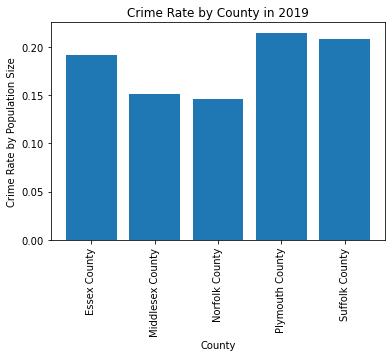

In [56]:
#My first question is which one had the lowest rate of crime in 2019
df_2019=df.loc[df['Year']==2019]
df_2019_Total=df.groupby('County').Rate.mean()
Counties=['Essex County','Middlesex County','Norfolk County','Plymouth County','Suffolk County']

plt.bar(Counties,df_2019_Total,0.8)
plt.ylabel("Crime Rate by Population Size")
plt.xlabel("County")
plt.xticks(rotation=90)
plt.title("Crime Rate by County in 2019")

#This shows that Norfolk County had the lowest crime rate in 2019

Text(0.5, 1.0, 'Total Count of Crimes over Time')

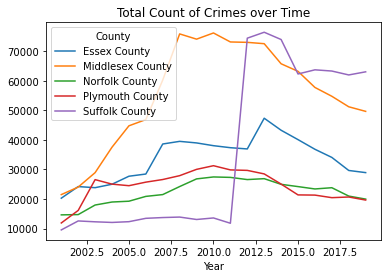

In [80]:
#My second question is how the count of total crimes are changing by county over time. 
df_by_year=df.groupby(['County', 'Year']).sum()
df_by_year=df_by_year.drop(columns=['Rate']).reset_index()
df_by_year=df_by_year.pivot(index='Year', columns = 'County', values='Count')
df_by_year.plot()
plt.title("Total Count of Crimes over Time")

#From the graph below, I can see that most counties are trending down over time 
#other than Suffolk which appears fairly level from 2015 on. There is a large jump with Suffolk and Middlesex 
#from the early 2000s to the 2010s. I would look into if this accurate and how it related to the growth in population
#since I am measuring total count of crimes in this and not the rate (crimes per population)

Intercept    601135.027778
Year           -297.350000
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     123.0
Date:                Sun, 25 Oct 2020   Prob (F-statistic):           1.08e-05
Time:                        14:52:14   Log-Likelihood:                -59.665
No. Observations:                   9   AIC:                             123.3
Df Residuals:                       7   BIC:                             123.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

C:\Users\Noela_tm\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


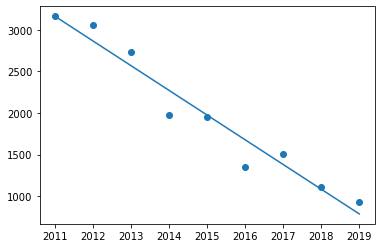

In [133]:
#Lastly I'd like to predict the future trend of Total Forcible Entry over time in Middlesex County and Norfolk County.
#I think 20 years is too far back, so I'm only going to look at it from the years greater than 2010.
#These two counties have the smallest rate of crime as per my first graph and since I'm buying a house, I care specifically
#about forced entry crimes so that is why I have selected that crime and these two counties. 

#First let's look at Middlesex. 
df_Force_M=df.loc[df['Offense']=='Forcible Entry']
df_Force_M=df_Force_M.loc[df_Force_M['County']=='Middlesex County']
df_Force_M=df_Force_M.loc[df_Force_M['Year']>2010]
df_Force_M=df_Force_M.groupby(['County', 'Year']).sum()
df_Force_M=df_Force_M.drop(columns=['Rate']).reset_index()
x=df_Force_M['Year']
y=df_Force_M['Count']
plt.scatter(x,y)

#I will add a trend line that shows the trend of forcible entry over the past 10 years 
#and see how close of a fit it is. 
import statsmodels.api as sm
import statsmodels.formula.api as smf
results=smf.ols('Count ~ Year', data=df_Force_M).fit()
print(results.params)
print(results.summary())
plt.plot(x,results.fittedvalues)

#Below I can see that the R-Square value is 0.94, which means the trend line is a very good fit. 
#I can also see visually on the graph that Forcible Entry is trending down steadily over time
#The 'Year' data from the ols results params shows 297 less Forcible Entries occuring each year. 

Intercept    231901.361111
Year           -114.683333
dtype: float64


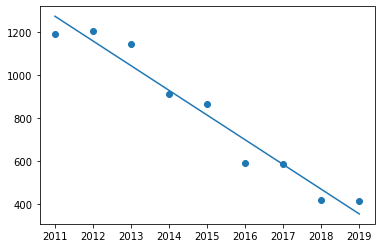

In [136]:
#When comparing Middlesex County to Norfolk county,

df_Force_N=df.loc[df['Offense']=='Forcible Entry']
df_Force_N=df_Force_N.loc[df_Force_N['County']=='Norfolk County']
df_Force_N=df_Force_N.loc[df_Force_N['Year']>2010]
df_Force_N=df_Force_N.groupby(['County', 'Year']).sum()
df_Force_N=df_Force_N.drop(columns=['Rate']).reset_index()
x1=df_Force_N['Year']
y1=df_Force_N['Count']
plt.scatter(x1,y1)

import statsmodels.api as sm
import statsmodels.formula.api as smf
results_N=smf.ols('Count ~ Year', data=df_Force_N).fit()
print(results_N.params)
plt.plot(x1,results_N.fittedvalues)

#We can see that Norfolk is decreasing the number of Forced Entries by 114 
#per year, which is less than Middlesex which decreases by 297. So although Norfolk currently has less Forced Entries in 2019,
#Middlesex is trending down at a quicker rate than Norfolk. 

#in conclusion, both Norfolk and Middlesex have low rates of crime compared to the other counties in the Greater
#Boston area. Although Middlesex has more Forced Entries, it is 'cleaning up the streets' at a faster rate than 
#Norfolk. I think either would be a good place to buy a house and I will use this information when considering my options.